In [1]:
import _pickle as cPickle
import gzip
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from sklearn.metrics import mean_squared_error

# plot charts inline
%matplotlib inline

Using TensorFlow backend.


In [0]:
batch_size = 32
epochs = 10
num_classes = 10


def separate_componenets_frame(dataframe_set):
  
    X_set,Y_set = dataframe_set[0],dataframe_set[1]
    X_set = X_set / 255
    
    Y_set = to_categorical(Y_set)
    
    X_set = np.array(X_set).reshape(-1,28,28, 1)
    
    return X_set,Y_set

def load_dataset(fileName):
    file_loaded = gzip.open(fileName, "rb")
    train_set, valid_set, test_set = cPickle.load(file_loaded,encoding="latin1")
    file_loaded.close()
    return train_set, valid_set, test_set

def create_model():
    
    cnn_model = Sequential()
    cnn_model.add(Conv2D(batch_size, kernel_size=(2, 2),activation='linear',input_shape=(28,28,1),padding='same'))
    cnn_model.add(LeakyReLU(alpha=0.1))
    cnn_model.add(MaxPooling2D((2, 2),padding='same'))
    cnn_model.add(Conv2D(batch_size*2, (3, 3), activation='linear',padding='same'))
    cnn_model.add(LeakyReLU(alpha=0.1))
    cnn_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    cnn_model.add(Conv2D(batch_size*4, (3, 3), activation='linear',padding='same'))
    cnn_model.add(LeakyReLU(alpha=0.1))                  
    cnn_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(128, activation='linear'))
    cnn_model.add(LeakyReLU(alpha=0.1))                  
    cnn_model.add(Dense(10, activation='softmax'))
    
    cnn_model.compile(loss="categorical_crossentropy", \
             optimizer="adam", \
              metrics=["accuracy","mae"])
    
    return cnn_model

def print_model_summary(model):
    model.summary()
    
def fit_model(X_train,Y_train, X_validate,Y_validate , model):
    
    callbacks_list = [EarlyStopping(monitor='val_loss', patience=3)]
    training = model.fit(X_train, Y_train, \
                   validation_data = [X_validate, Y_validate], \
                   shuffle = True, epochs = 1, \
                   batch_size = 64, callbacks = callbacks_list)
    
    return training

def plot_training_process(process_history):
    df=pd.DataFrame.from_dict(process_history)
    df.index.name='epoch'
    #print(df)

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,3));

    df[["train_acc", "val_acc","test_acc"]].plot(ax=axes[0]);
    df[["train_loss", "val_loss"]].plot(ax=axes[1]);
    
    df[["train_error", "val_error","test_error"]].plot();
    plt.show();
    
def calculate_accuracy(X_test, Y_test, model):
    pred=cnn_model.predict(X_test)
    # evaluate the model
    scores = cnn_model.evaluate(X_test, Y_test, verbose=0)
    accuracy = (scores[1])
    error = mean_squared_error(Y_test, pred)
    return accuracy, error
    

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 10s 191us/step - loss: 1.7675 - acc: 0.3289 - mean_absolute_error: 0.1412 - val_loss: 0.1972 - val_acc: 0.9430 - val_mean_absolute_error: 0.0207
Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 5s 90us/step - loss: 0.1264 - acc: 0.9603 - mean_absolute_error: 0.0130 - val_loss: 0.0792 - val_acc: 0.9773 - val_mean_absolute_error: 0.0076
Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 5s 92us/step - loss: 0.0719 - acc: 0.9771 - mean_absolute_error: 0.0074 - val_loss: 0.0777 - val_acc: 0.9773 - val_mean_absolute_error: 0.0069
Train on 50000 samples, validate on 10000 samples
Epoch 1/1
50000/50000 [==============================] - 5s 91us/step - loss: 

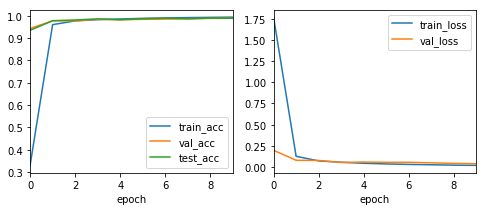

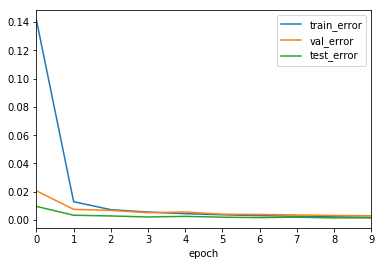

Accuracy : 98.96%


In [3]:
train_set, validation_set, test_set = load_dataset("mnist.pkl.gz")

X_train,Y_train = separate_componenets_frame(train_set)
X_valid,Y_valid = separate_componenets_frame(validation_set)
X_test,Y_test = separate_componenets_frame(test_set)

cnn_model = create_model()
#print_model_summary(cnn_model)
accuracies_train =[]
accuracies_valid =[]
accuracies_test =[]

error_train=[]
error_val=[]
error_test =[]

loss_train =[]
loss_valid =[]

for i in range(epochs):
    
    training = fit_model(X_train,Y_train, X_valid,Y_valid,cnn_model)
    
    accuracies_train.append(training.history["acc"][0])
    accuracies_valid.append(training.history["val_acc"][0])
    
    loss_train.append(training.history["loss"][0])
    loss_valid.append(training.history["val_loss"][0])
    error_train.append(training.history["mean_absolute_error"][0])
    error_val.append(training.history["val_mean_absolute_error"][0])
    
    accuracy_test, error = calculate_accuracy(X_test, Y_test, model = cnn_model)
    accuracies_test.append(accuracy_test)
    error_test.append(error)
    
epoch_history = {"train_loss":loss_train,"val_loss":loss_valid,\
                 "train_acc":accuracies_train,"val_acc":accuracies_valid,\
                "test_acc":accuracies_test, "test_error":error_test,\
                "train_error":error_train, "val_error":error_val}
plot_training_process(process_history = epoch_history)
max_accuracy = np.max(accuracies_test)
max_accuracy = max_accuracy*100
print("Accuracy : %.2f%%" % max_accuracy)

